In [5]:
from psi import Pipeline
from psi.feature_selection import LassoFeatureSelection
from psi import Data
from psi.test_statistics import FSTestStatistic
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def test_pipeline() -> Pipeline:
    x = Data()
    y = Data()
    
    lasso = LassoFeatureSelection(lambda_=10)
    active_set = lasso.run(x, y)
    return Pipeline(inputs=(x, y), output=active_set, test_statistic=FSTestStatistic(x=x, y=y))

In [7]:
def gen_data(n, p, true_beta):
    x = np.random.normal(loc = 0, scale = 1, size = (n, p))
    true_beta = true_beta.reshape(-1, 1)
    
    mu = x.dot(true_beta)
    Sigma = np.identity(n)
    Y = mu + np.random.normal(loc = 0, scale = 1, size = (n, 1))
    return x, Y, Sigma

In [8]:
my_pipeline = test_pipeline()

num_iters = 1000
list_p_value = []
for _ in range(num_iters):
    x, y, sigma = gen_data(150, 5, np.asarray([0, 0, 0, 0, 0]))
    selected_features, p_values = my_pipeline([x, y], sigma)
    list_p_value.extend(p_values)

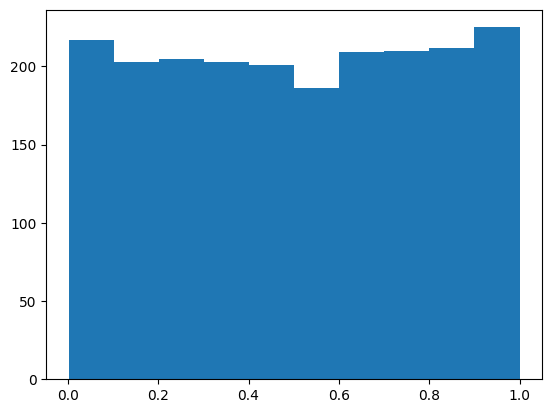

In [9]:
plt.hist(list_p_value)
plt.show()